# Predicting salary of higher education employees from Ohio's public universities
dataset: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

# Getting nessecary libs

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


# Getting data from csv

In [44]:
df = pd.read_csv('./data/CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [45]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# Clearing data
Steps:
1) Identify the missing values
2) If number will be empty fill it with mean, strings can be filled by something like "No Description"


In [46]:
#Step 1: Identify the missing values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

No missing values

# Processing the futures

Now, it is time to encode categorial features

In [47]:
unique_count = {'Unique fuel': df['fuel'].nunique(), 
           'Unique seller_type': df['seller_type'].nunique(), 
           'Unique transmission': df['transmission'].nunique(), 
           'Unique owner': df['owner'].nunique()}

unique_count

{'Unique fuel': 5,
 'Unique seller_type': 3,
 'Unique transmission': 2,
 'Unique owner': 5}

In [48]:
distinct_values = {'Fuel': df['fuel'].unique(), 
           'Seller Type': df['seller_type'].unique(), 
           'Transmission': df['transmission'].unique(), 
           'Owner': df['owner'].unique()}

distinct_values

{'Fuel': array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object),
 'Seller Type': array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 'Transmission': array(['Manual', 'Automatic'], dtype=object),
 'Owner': array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
        'Third Owner', 'Test Drive Car'], dtype=object)}

In [49]:
count_values = {'Fuel': df['fuel'].value_counts(),
              'Seller Type': df['seller_type'].value_counts(),
              'Transmission': df['transmission'].value_counts(),
              'Owner': df['owner'].value_counts()}
count_values


{'Fuel': fuel
 Diesel      2153
 Petrol      2123
 CNG           40
 LPG           23
 Electric       1
 Name: count, dtype: int64,
 'Seller Type': seller_type
 Individual          3244
 Dealer               994
 Trustmark Dealer     102
 Name: count, dtype: int64,
 'Transmission': transmission
 Manual       3892
 Automatic     448
 Name: count, dtype: int64,
 'Owner': owner
 First Owner             2832
 Second Owner            1106
 Third Owner              304
 Fourth & Above Owner      81
 Test Drive Car            17
 Name: count, dtype: int64}

I have noticed that these categorial variables have little variety, so i can encode them by label encoding
Then using these values to evaluate the importance of each variable


In [50]:
df['fuel'] = df['fuel'].replace({'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4})
df['seller_type'] = df['seller_type'].replace({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})
df['transmission'] = df['transmission'].replace({'Manual': 0, 'Automatic': 1})
df['owner'] = df['owner'].replace({'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4})

df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_20752\4053327973.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fuel'] = df['fuel'].replace({'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4})
C:\Users\User\AppData\Local\Temp\ipykernel_20752\4053327973.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['seller_type'] = df['seller_type'].replace({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})
C:\Users\User\AppData\Local\Temp\ipykernel_20752\4053327973.py:3: FutureWarning: Downcasting behavior in `replace` i

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


# Identifing important features and correlations

<Axes: xlabel='owner', ylabel='selling_price'>

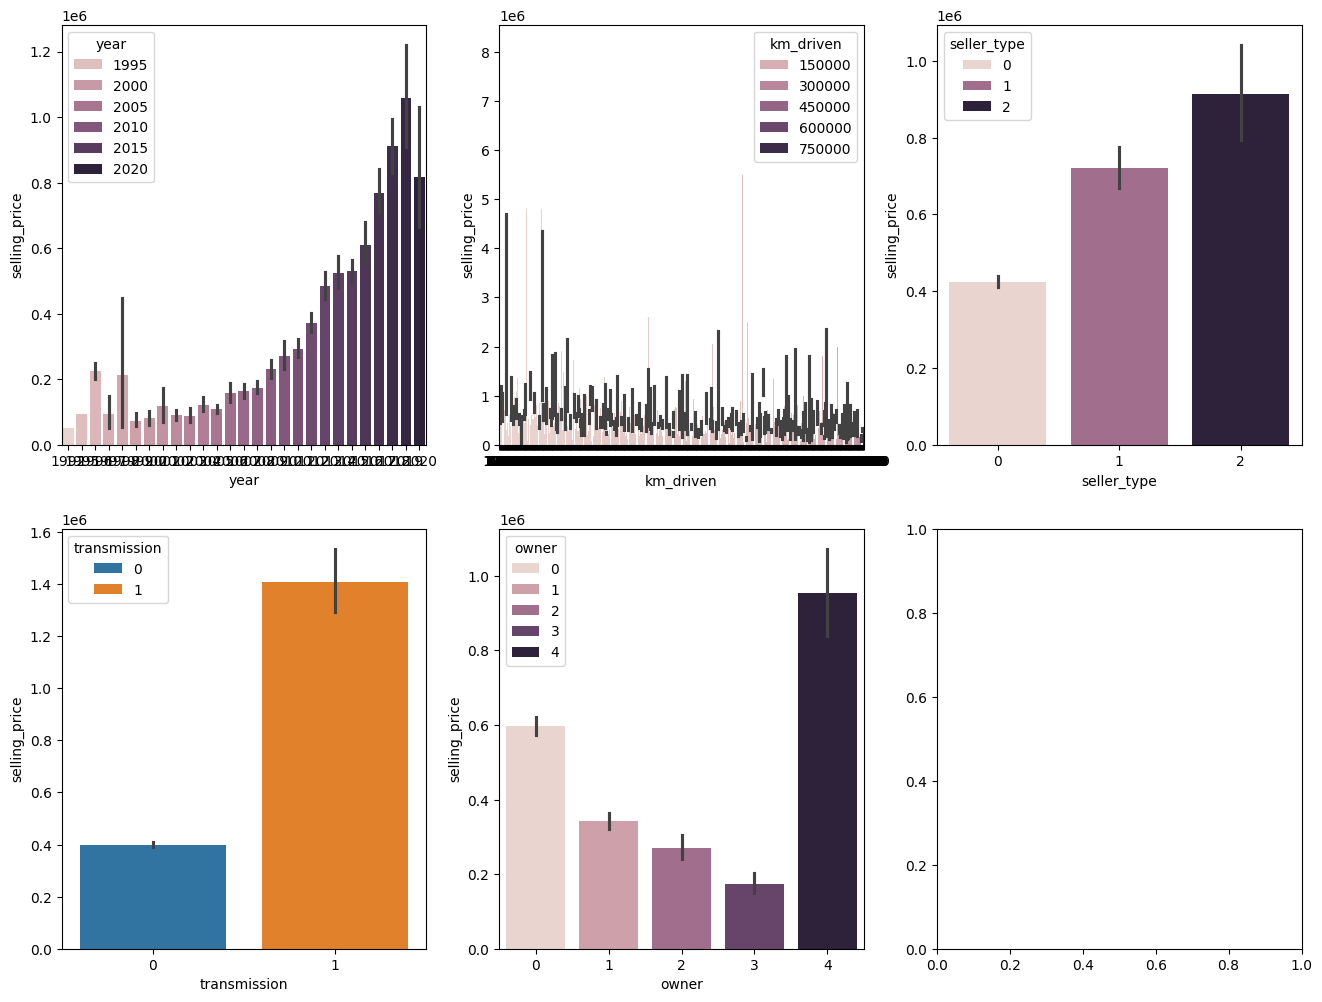

In [51]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(data = df, x = "year", y = "selling_price", ax = saxis[0][0], hue="year")
sns.barplot(data = df, x = "km_driven", y = "selling_price", ax = saxis[0][1], hue="km_driven")
sns.barplot(data = df, x = "seller_type", y = "selling_price", ax = saxis[0,2], hue="seller_type")
sns.barplot(data = df, x = "transmission", y = "selling_price", ax = saxis[1,0], hue="transmission")
sns.barplot(data = df, x = "owner", y = "selling_price", ax = saxis[1,1], hue="owner")

We can see here correlation between year and price of car:
    I think the price is higher because the new car has never been in an accident, 
    has all the parts and nothing has been broken yet

The second graph is a bit noisy, i can't give the clear answer if there is an correlation
but it seems to me that the less km was driven, the more car costs

The third graph shows that customers often trust trustmarket dealers, than individuals
and that they are ready to overpay for trust and service

The fourth graph shows clear that price depends on transmission type
Almost 75% of expensive cars have automatic transmission

The fifth graph is showing some strange information,
but i think that this happend due to lack of information about test drive cars
in dataset there are only 17


# Creating train and validation subsets

In [78]:
features = ['year', 'km_driven', 'seller_type', 'transmission', 'owner']

X_train = df[features]

X_train

,year,km_driven,seller_type,transmission,owner
0,2007,70000,0,0,0
1,2007,50000,0,0,0
2,2012,100000,0,0,0
3,2017,46000,0,0,0
4,2014,141000,0,0,1
...,...,...,...,...,...
4335,2014,80000,0,0,1
4336,2014,80000,0,0,1
4337,2009,83000,0,0,1
4338,2016,90000,0,0,0


In [79]:
y_train = pd.DataFrame(df, columns=['selling_price'])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33)
y_train

,selling_price
3880,600000
3808,550000
3034,245000
1743,225000
196,250000
...,...
2737,3800000
1756,325000
148,430000
609,450000


# Training model

In [83]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)


In [68]:
lr.coef_, lr.intercept_

(array([[198371.93954153,  15302.30784732,  60300.07732707,
         265042.17171565,   2695.24893423]]),
 array([505222.73133815]))

# Scoring model

In [69]:
print("Train: \n", "\tR2: " + str(r2_score(y_train, y_train_pred)) + "\n", 
      "\tMSE: " +  str(np.sqrt(mean_squared_error(y_train, y_train_pred)))+ "\n", 
      "\tMAE: " + str(mean_absolute_error(y_train, y_train_pred)))
 


Train: 
 	R2: 0.014158620180096504
 	MSE: 580017.0337258219
 	MAE: 257940.97764017887


In [70]:
print("Validation: \n", "\tR2: " + str(r2_score(y_val, y_val_pred)) + "\n", 
      "\tMSE: " +  str(np.sqrt(mean_squared_error(y_val, y_val_pred)))+ "\n", 
      "\tMAE: " + str(mean_absolute_error(y_val, y_val_pred)))

Validation: 
 	R2: -0.13392534542790013
 	MSE: 603527.4992519976
 	MAE: 258020.864619679


In [71]:
print("Cross Validation: ", cross_val_score(lr, X_train, y_train, cv=5).mean())

Cross Validation:  0.3930582854756101
